In [1]:
import os
import openai
from dotenv import load_dotenv

In [2]:
load_dotenv()  # Load environment variables from .env file

# Ensure the OPENAI_API_KEY is set
openai.api_key = os.getenv("OPENAI_API_KEY")
if openai.api_key is None:
    raise ValueError("OPENAI_API_KEY environment variable not set")

client = openai.OpenAI()

# Assistants API
An Assistant has instructions and can leverage models, tools, and files to respond to user queries.

The Assistants API currently supports three types of tools: Code Interpreter, File Search, and Function calling.

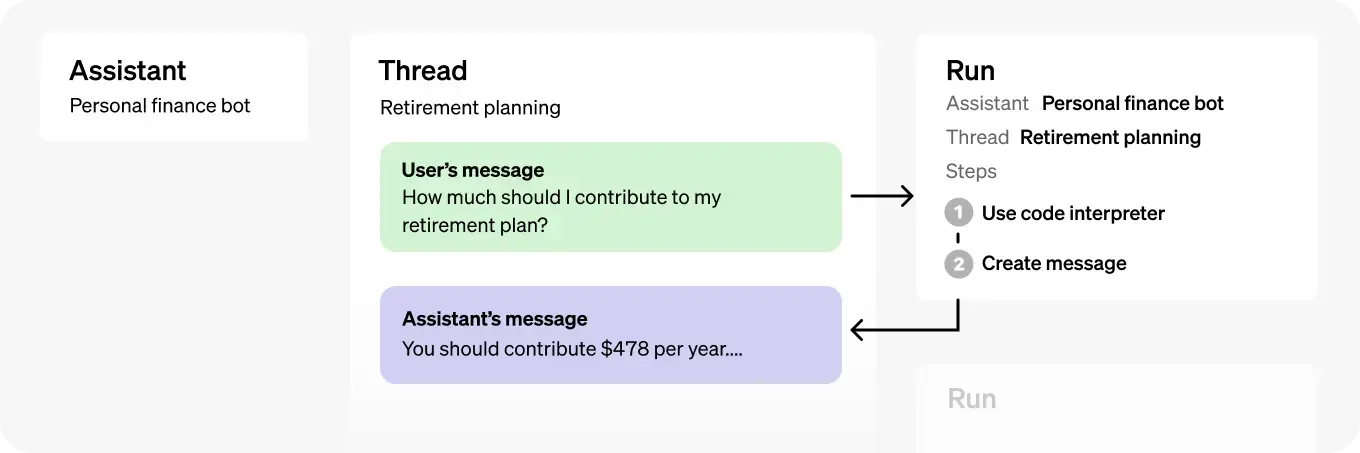

## Step 1: Create an Assistant
An Assistant represents an entity that can be configured to respond to a user's messages using several parameters like model, instructions, and tools.

In [3]:
client = openai.OpenAI()

assistant = client.beta.assistants.create(
  name="Math Tutor",
  instructions="You are a personal math tutor. Write and run code to answer math questions.",
  tools=[{"type": "code_interpreter"}],
  model="gpt-4o",
)

## Step 2: Create a Thread
A Thread represents a conversation between a user and one or many Assistants. We can create a Thread when a user (or our AI application) starts a conversation with your Assistant.

In [4]:
thread = client.beta.threads.create()

C:\Users\thiag\AppData\Local\Temp\ipykernel_47392\3600338518.py:1: DeprecationWarning: The Assistants API is deprecated in favor of the Responses API
  thread = client.beta.threads.create()


## Step 3: Add a Message to the Thread
The contents of the messages our users or applications create are added as Message objects to the Thread. Messages can contain both text and files. There is a limit of 100,000 Messages per Thread and we smartly truncate any context that does not fit into the model's context window.

In [5]:
message = client.beta.threads.messages.create(
  thread_id=thread.id,
  role="user",
  content="I need to solve the equation `3x + 11 = 14`. Can you help me?"
)

C:\Users\thiag\AppData\Local\Temp\ipykernel_47392\575982990.py:1: DeprecationWarning: The Assistants API is deprecated in favor of the Responses API
  message = client.beta.threads.messages.create(


## Step 4: Create a Run
Once all the user Messages have been added to the Thread, we can Run the Thread with any Assistant. Creating a Run uses the model and tools associated with the Assistant to generate a response. These responses are added to the Thread as assistant Messages.

Runs are asynchronous, which means we'll want to monitor their status by polling the Run object until a terminal status is reached. For convenience, the 'create and poll' SDK helpers assist both in creating the run and then polling for its completion.

In [6]:
run = client.beta.threads.runs.create_and_poll(
  thread_id=thread.id,
  assistant_id=assistant.id,
  instructions="Please address the user as Jane Doe. The user has a premium account."
)

C:\Users\thiag\AppData\Local\Temp\ipykernel_47392\541390683.py:1: DeprecationWarning: The Assistants API is deprecated in favor of the Responses API
  run = client.beta.threads.runs.create_and_poll(


Once the Run completes, we can list the Messages added to the Thread by the Assistant.

In [7]:
if run.status == 'completed': 
  messages = client.beta.threads.messages.list(
    thread_id=thread.id
  )
  print(messages)
else:
  print(run.status)

C:\Users\thiag\AppData\Local\Temp\ipykernel_47392\494989899.py:2: DeprecationWarning: The Assistants API is deprecated in favor of the Responses API
  messages = client.beta.threads.messages.list(


SyncCursorPage[Message](data=[Message(id='msg_gDP6Vu8KbFwa9xPI8gpCH8VH', assistant_id='asst_YKC1mdm4k3pw3CrmarvY79Y6', attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value='The solution to the equation \\(3x + 11 = 14\\) is \\(x = 1\\).'), type='text')], created_at=1749387386, incomplete_at=None, incomplete_details=None, metadata={}, object='thread.message', role='assistant', run_id='run_WbmZGHJdK7JQzqdd7DAIcxSo', status=None, thread_id='thread_gBxgpim44ibBvHcAqhixxkUh'), Message(id='msg_XJabb7rpvlxV59zbFCZQxwki', assistant_id='asst_YKC1mdm4k3pw3CrmarvY79Y6', attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value="Certainly, Jane Doe! To solve the equation \\(3x + 11 = 14\\), we need to isolate \\(x\\). Here's how to do it:\n\n1. Subtract 11 from both sides of the equation to get:  \n   \\(3x + 11 - 11 = 14 - 11\\)  \n   which simplifies to:  \n   \\(3x = 3\\).\n\n2. Divide both sides by 3 to solve for \\(x\\

Run lifecycle

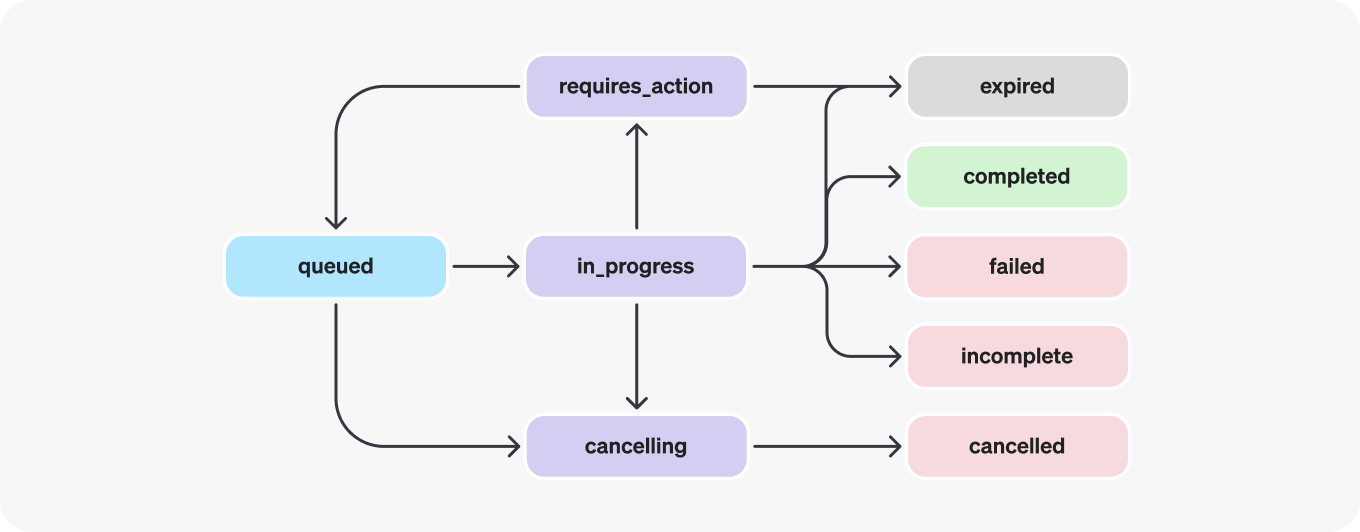

In [8]:
print(messages.data[0].content[0].text.value)

The solution to the equation \(3x + 11 = 14\) is \(x = 1\).


Analisando o raciocínio do modelo...

In [ ]:
run_steps = client.beta.threads.runs.steps.list(
    thread_id=thread.id,
    run_id=run.id
)
run_steps

C:\Users\thiag\AppData\Local\Temp\ipykernel_47392\1065570181.py:1: DeprecationWarning: The Assistants API is deprecated in favor of the Responses API
  run_steps = client.beta.threads.runs.steps.list(


SyncCursorPage[RunStep](data=[RunStep(id='step_JT3dJAlh3EgbHBIMcdh0RXzJ', assistant_id='asst_YKC1mdm4k3pw3CrmarvY79Y6', cancelled_at=None, completed_at=1749387389, created_at=1749387386, expired_at=None, failed_at=None, last_error=None, metadata=None, object='thread.run.step', run_id='run_WbmZGHJdK7JQzqdd7DAIcxSo', status='completed', step_details=MessageCreationStepDetails(message_creation=MessageCreation(message_id='msg_gDP6Vu8KbFwa9xPI8gpCH8VH'), type='message_creation'), thread_id='thread_gBxgpim44ibBvHcAqhixxkUh', type='message_creation', usage=Usage(completion_tokens=26, prompt_tokens=323, total_tokens=349, prompt_token_details={'cached_tokens': 0}, completion_tokens_details={'reasoning_tokens': 0}), expires_at=None), RunStep(id='step_WuQxvOXPesFKf6uOlQI3G8FN', assistant_id='asst_YKC1mdm4k3pw3CrmarvY79Y6', cancelled_at=None, completed_at=1749387386, created_at=1749387385, expired_at=None, failed_at=None, last_error=None, metadata=None, object='thread.run.step', run_id='run_WbmZGH

In [22]:
for step in run_steps.data[::-1]:  # Reverse order to show the latest step first
    print(f"\nStep {step.id}: {step.step_details.type}")
    if step.step_details.type == 'tool_calls':
        for tool_call in step.step_details.tool_calls:
            print(f"---- Tool Call: {tool_call.type}")
            if tool_call.type == 'code_interpreter':
                print(f"-------- Input: {tool_call.code_interpreter.input}")
                if tool_call.code_interpreter.outputs:
                    print(f"-------- Result: {tool_call.code_interpreter.outputs[0].logs}")
    if step.step_details.type == 'message_creation':
        message_content = client.beta.threads.messages.retrieve(
            thread_id=thread.id,
            message_id=step.step_details.message_creation.message_id
        )
        print(f"---- Message: {message_content.content[0].text.value}")


Step step_p8tnUW74lgUOm97QfaewQXXD: message_creation


C:\Users\thiag\AppData\Local\Temp\ipykernel_47392\41657795.py:11: DeprecationWarning: The Assistants API is deprecated in favor of the Responses API
  message_content = client.beta.threads.messages.retrieve(


---- Message: Certainly, Jane Doe! To solve the equation \(3x + 11 = 14\), we need to isolate \(x\). Here's how to do it:

1. Subtract 11 from both sides of the equation to get:  
   \(3x + 11 - 11 = 14 - 11\)  
   which simplifies to:  
   \(3x = 3\).

2. Divide both sides by 3 to solve for \(x\):  
   \(x = \frac{3}{3}\).

Let's calculate the solution for \(x\).

Step step_WuQxvOXPesFKf6uOlQI3G8FN: tool_calls
---- Tool Call: code_interpreter
-------- Input: # Solve the equation 3x + 11 = 14
x = (14 - 11) / 3
x

Step step_JT3dJAlh3EgbHBIMcdh0RXzJ: message_creation
---- Message: The solution to the equation \(3x + 11 = 14\) is \(x = 1\).
